In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
z = np.array([3,6,9,12,15])

In [2]:
#Covariance
cov_matrix = np.cov([x,y,z])
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]


In [4]:
#Correlation coeficient
cor_matrix = np.corrcoef([x,y,z])
print("Correlation Matrix:")
print(cor_matrix)

Correlation Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [8]:
threshold = 0.7

print("Variables with high multicollinearity:")
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            print(f"Variable {i+1} and Variable {i+1}")

Variables with high multicollinearity:
Variable 1 and Variable 1
Variable 1 and Variable 1
Variable 2 and Variable 2


In [9]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x3 = np.random.normal(0, 1, 100)

data = np.vstack([x1, x2, x3]).T
cor_matrix = np.corrcoef(data, rowvar=False)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

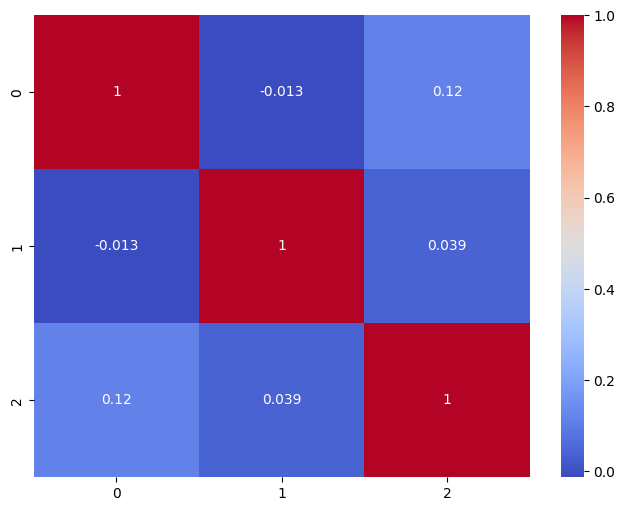

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

In [14]:
threshold = 0.1
selected_vars = []
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            selected_vars.extend([i,j])
            
print(selected_vars)
            

[0, 2]


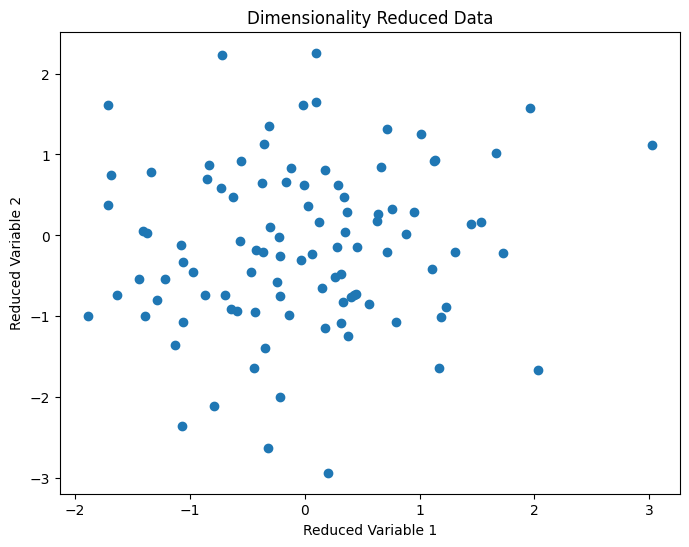

In [22]:
if selected_vars:
    reduced_data = data[:, list(set(selected_vars))]
    
    plt.figure(figsize=(8,6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
    plt.xlabel('Reduced Variable 1')
    plt.ylabel('Reduced Variable 2')
    plt.title('Dimensionality Reduced Data')
    plt.show()
else:
    print('Empty list')

In [18]:
import seaborn as sns

In [19]:
tips = sns.load_dataset('tips')

In [20]:
corr = tips['total_bill'].corr(tips['tip'], method='pearson')
print('Pearson correlation coefficient : ', corr)

Pearson correlation coefficient :  0.6757341092113645


In [23]:
print(type(tips))
print(tips)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [29]:
corr = tips[['total_bill', 'tip', 'size']].corr()
print(corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


In [33]:
np.random.seed(42)
math_scores = np.random.normal(loc=70, scale=10, size=(300,))
english_scores = np.random.normal(loc=80, scale=8, size=(300,))
korean_scores = np.random.normal(loc=75, scale=12, size=(300,))

In [34]:
grades = np.repeat([1, 2, 3], 100)

In [36]:
df = pd.DataFrame({
    'Grade' : grades,
    'Math' : math_scores,
    'Enlish' : english_scores,
    'Korean' : korean_scores
})

In [37]:
df.to_csv('./data/student_score.csv', index=False)

In [38]:
df = pd.read_csv('./data/student_score.csv')
print(df)

     Grade       Math     Enlish     Korean
0        1  74.967142  73.368040  84.083863
1        1  68.617357  75.518552  63.934016
2        1  76.476885  85.978349  85.435271
3        1  85.230299  84.882962  91.267654
4        1  67.658466  79.832787  79.961219
..     ...        ...        ...        ...
295      3  63.070904  75.919869  82.784519
296      3  78.995999  77.841001  72.994583
297      3  73.072995  72.169890  76.760564
298      3  78.128621  76.445654  89.478108
299      3  76.296288  83.018404  65.196772

[300 rows x 4 columns]


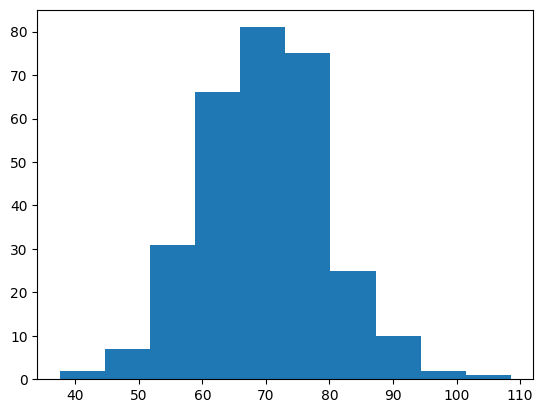

In [40]:
plt.hist(df['Math'], bins=10)
plt.show()

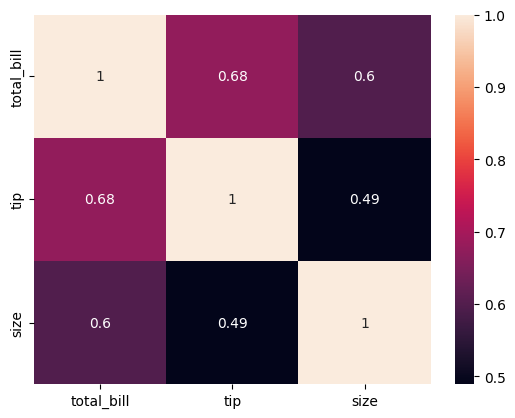

In [41]:
sns.heatmap(corr, annot=True)
plt.show()

In [43]:
from sklearn.decomposition import PCA

In [44]:
x = np.random.rand(100, 3)

In [45]:
pca = PCA(n_components = 2)
pca.fit(x)

PCA(n_components=2)

In [46]:
transformed_data = pca.transform(x)

In [49]:
explained_var_ratio = pca.explained_variance_ratio_
print(f'주성분의 설명력 : {explained_var_ratio}')

주성분의 설명력 : [0.37821897 0.35575349]


In [51]:
components = pca.components_
print(f'주성분의 가중치 : {components}')

주성분의 가중치 : [[-0.57736548  0.26840488  0.77110824]
 [ 0.14733596 -0.89467019  0.42173138]]


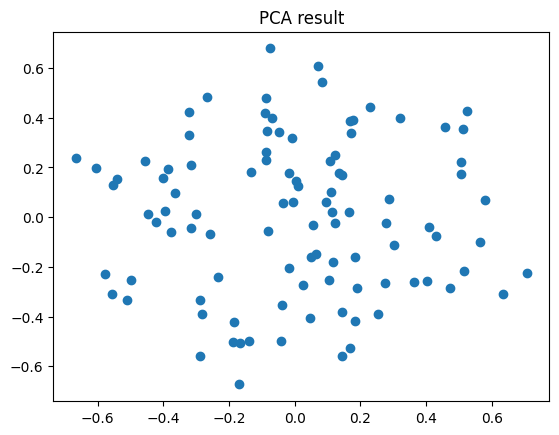

In [53]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title("PCA result")
plt.show()